#Scraping Data

In [1]:
!pip install google-play-scraper

In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [3]:
#scrape jumlah ulasan yang diinginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.linkedin.android',
    lang='id',  #disini kita mau men scrape data ulasan aplikasi shopee yang berada di google play store
    country='id', #kita setting bahasa nya menjadi bahasa indonesia
    sort=Sort.MOST_RELEVANT, # # kemudian kita gunakan most_relevan untuk mendapatkan ulasan yang paling relevant
    count=6000, # disini jumlah ulasan yang mau kita ambil ada seribu
    filter_score_with=None # # kemudian di filter_score kita gunakan None untuk mengambil semua score atau ratting bintang 1 sampai 5
)

In [4]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])
df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))
df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,defadb27-c941-4df0-b2f0-dd153a5937d6,Sunkissed,https://play-lh.googleusercontent.com/a-/ALV-U...,"Berhubung lupa, niatnya mau cek akun sekalian ...",1,202,4.1.875,2023-10-29 15:11:34,None,NaT,4.1.875
1,cdef5c81-8b11-4fb0-a425-7cd764960cb4,bastiar indexautomation,https://play-lh.googleusercontent.com/a-/ALV-U...,"LinkedIn sudah tidak berfungsi, login akun lam...",1,24,4.1.881,2023-11-12 02:34:57,None,NaT,4.1.881
2,0136c4d4-e2a7-4fcd-a642-a46682354e38,Muhammad risky,https://play-lh.googleusercontent.com/a-/ALV-U...,Kenapa yah setiap mau bikin postingan itu cuma...,4,29,4.1.881,2023-11-09 13:49:27,None,NaT,4.1.881
3,dddd037f-2b75-4e49-b51f-b1f56b6d4a81,adam lioga26,https://play-lh.googleusercontent.com/a-/ALV-U...,"good apps, mau nanya apakah bisa memasukkan se...",4,37,4.1.878,2023-11-09 17:12:20,None,NaT,4.1.878
4,074e5bac-7501-458d-9c40-a588a810b7fb,eunike nta,https://play-lh.googleusercontent.com/a-/ALV-U...,So bad mau masuk lagi verivikasi nya pake gamb...,1,28,4.1.878,2023-11-08 02:01:44,None,NaT,4.1.878


In [5]:
df_busu.shape

(6000, 11)

In [6]:
#Run This Code to Sort the Data By Date

new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,userName,score,at,content
270,Wahid Ramdhan,5,2023-11-14 12:17:00,"Bagus , sangat membantu"
489,aulia noor,5,2023-11-14 09:24:44,"Apps yg berguna untuk cari temen, dan nqmbah c..."
271,Nina nur Azizah,2,2023-11-13 03:28:16,Cara loginnya gmna ini bikin emosi loh
1421,anton aprisunaryadi,5,2023-11-13 03:17:19,Apk yang sangat membantu dlm mencari peluang k...
104,fahmi rizki rizaldi,5,2023-11-12 12:06:33,Social media yg bagus untuk mencari kerja


In [7]:
my_df=sorted_df[['content', 'score']]
#karena kita hanya membutuhkan kolom content dan score maka kita lakukan filter kolom lgi hingga menyisakan kolom content dan score.

In [8]:
print(my_df)

                                                content  score
270                             Bagus , sangat membantu      5
489   Apps yg berguna untuk cari temen, dan nqmbah c...      5
271              Cara loginnya gmna ini bikin emosi loh      2
1421  Apk yang sangat membantu dlm mencari peluang k...      5
104           Social media yg bagus untuk mencari kerja      5
...                                                 ...    ...
5819                         Baru nyoba jadi belum tahu      5
2531  Satu kata; Bagus. Satu kalimat; Profesional ha...      5
4199      Penasaran ama aplikasi ini,buat apa fungsinya      4
4035      Penasaran ama aplikasi ini,buat apa fungsinya      4
4113                                  Sangat membantu 🖒      5

[6000 rows x 2 columns]


In [9]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 3 :
    return 'Netral'
  elif score > 3 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(50)

<ipython-input-9-674b4ca6ef3f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['Label'] = my_df ['score'].apply(pelabelan)


,content,score,Label
270,"Bagus , sangat membantu",5,Positif
489,"Apps yg berguna untuk cari temen, dan nqmbah c...",5,Positif
271,Cara loginnya gmna ini bikin emosi loh,2,Negatif
1421,Apk yang sangat membantu dlm mencari peluang k...,5,Positif
104,Social media yg bagus untuk mencari kerja,5,Positif
21,Tolong diperbaiki lagi karena masih sangat ban...,1,Negatif
1,"LinkedIn sudah tidak berfungsi, login akun lam...",1,Negatif
269,Linkedin sekarang sudah menjadi hiburan social...,2,Negatif
4456,Untuk mecari informasi,5,Positif
2812,wa irwan tdk muncul tlg bantu bos,4,Positif


In [10]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 270 to 4113
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  6000 non-null   object
 1   score    6000 non-null   int64 
 2   Label    6000 non-null   object
dtypes: int64(1), object(2)
memory usage: 187.5+ KB


In [11]:
my_df.isnull().sum()

content    0
score      0
Label      0
dtype: int64

In [12]:
my_df.duplicated().sum()

619

In [13]:
df = my_df.drop_duplicates().sum()

In [14]:
df.duplicated().sum()

0

In [15]:
my_df.to_excel("scrapping_data_linkedin.xlsx", index = False)  #kemudian save menjadi file csv

#Pre Processing

In [16]:
!pip install nltk
!pip install sastrawi
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 3.3 MB/s eta 0:00:00


In [17]:
import pandas as pd
import nltk
import re
import string
import emoji
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt');

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [18]:
# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [19]:
# Load data from Excel file
file_path = 'scrapping_data_linkedin.xlsx'
my_df = pd.read_excel(file_path)

In [20]:
# Proses Cleaning

def remove_kata(comment):
  comment = comment.replace('\t', ' ').replace('\n', ' ').replace('\\u', ' ').replace('\\', '')
  comment = comment.encode('ascii', 'replace').decode('ascii')
  comment = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/S+)", " ", comment).split())
  return comment.replace("http://", " ").replace("https://", " ")

my_df['content'] = my_df['content'].apply(remove_kata)


def remove_angka(comment):
    return re.sub(r"\d+", " ", comment)

my_df['content'] = my_df['content'].apply(remove_angka)


def remove_punctuation(comment):
    return comment.translate(str.maketrans("", "", string.punctuation))

my_df['content'] = my_df['content'].apply(remove_punctuation)


def remove_whitespace_LT(comment):
    return comment.strip()

my_df['content'] = my_df['content'].apply(remove_whitespace_LT)


def remove_whitespace_multiple(comment):
    return re.sub('\s+', ' ', comment)

my_df['content'] = my_df['content'].apply(remove_whitespace_multiple)


def remove_single_char(comment):
    return re.sub(r"\b[a-zA-Z]\b", " ", comment)

my_df['content'] = my_df['content'].apply(remove_single_char)


print('Hasil Cleaning: \n')
print(my_df.head(50))

Hasil Cleaning: 

                                              content  score    Label
0                               Bagus sangat membantu      5  Positif
1   Apps yg berguna untuk cari temen dan nqmbah ch...      5  Positif
2              Cara loginnya gmna ini bikin emosi loh      2  Negatif
3   Apk yang sangat membantu dlm mencari peluang k...      5  Positif
4           Social media yg bagus untuk mencari kerja      5  Positif
5   Tolong diperbaiki lagi karena masih sangat ban...      1  Negatif
6   LinkedIn sudah tidak berfungsi login akun lama...      1  Negatif
7   Linkedin sekarang sudah menjadi hiburan social...      2  Negatif
8                              Untuk mecari informasi      5  Positif
9                   wa irwan tdk muncul tlg bantu bos      4  Positif
10                               untuk versi yg lawas      3   Netral
11               Luar biasa sangat membantu kita smua      5  Positif
12                         Terinspirasi dari perkerja      5  Positif
13

In [21]:
# Proses Case Folding

import re
import pandas as pd
def casefolding(comment):
    comment = comment.lower()
    comment = comment.strip()
    return comment
my_df['content'] = my_df['content'].apply(casefolding)
print('Hasil Case Folding: \n')
print(my_df.head(50))

Hasil Case Folding: 

                                              content  score    Label
0                               bagus sangat membantu      5  Positif
1   apps yg berguna untuk cari temen dan nqmbah ch...      5  Positif
2              cara loginnya gmna ini bikin emosi loh      2  Negatif
3   apk yang sangat membantu dlm mencari peluang k...      5  Positif
4           social media yg bagus untuk mencari kerja      5  Positif
5   tolong diperbaiki lagi karena masih sangat ban...      1  Negatif
6   linkedin sudah tidak berfungsi login akun lama...      1  Negatif
7   linkedin sekarang sudah menjadi hiburan social...      2  Negatif
8                              untuk mecari informasi      5  Positif
9                   wa irwan tdk muncul tlg bantu bos      4  Positif
10                               untuk versi yg lawas      3   Netral
11               luar biasa sangat membantu kita smua      5  Positif
12                         terinspirasi dari perkerja      5  Positi

In [22]:
my_df.to_excel('cleaning.xlsx', index=False)

data_fold = pd.read_excel('cleaning.xlsx')
print(data_fold.shape)
print(data_fold.head())

(6000, 3)
                                             content  score    Label
0                              bagus sangat membantu      5  Positif
1  apps yg berguna untuk cari temen dan nqmbah ch...      5  Positif
2             cara loginnya gmna ini bikin emosi loh      2  Negatif
3  apk yang sangat membantu dlm mencari peluang k...      5  Positif
4          social media yg bagus untuk mencari kerja      5  Positif


In [23]:
import string
import re

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [24]:
# Proses Tokenizing

import nltk
nltk.download('punkt')

def word_tokenize_wrapper(comment):
  return word_tokenize(comment)

my_df['content'] = my_df['content'].apply(word_tokenize_wrapper)

print('Hasil Tokenizing: \n')
print(my_df.head(20))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Hasil Tokenizing: 

                                              content  score    Label
0                           [bagus, sangat, membantu]      5  Positif
1   [apps, yg, berguna, untuk, cari, temen, dan, n...      5  Positif
2      [cara, loginnya, gmna, ini, bikin, emosi, loh]      2  Negatif
3   [apk, yang, sangat, membantu, dlm, mencari, pe...      5  Positif
4   [social, media, yg, bagus, untuk, mencari, kerja]      5  Positif
5   [tolong, diperbaiki, lagi, karena, masih, sang...      1  Negatif
6   [linkedin, sudah, tidak, berfungsi, login, aku...      1  Negatif
7   [linkedin, sekarang, sudah, menjadi, hiburan, ...      2  Negatif
8                          [untuk, mecari, informasi]      5  Positif
9           [wa, irwan, tdk, muncul, tlg, bantu, bos]      4  Positif
10                          [untuk, versi, yg, lawas]      3   Netral
11        [luar, biasa, sangat, membantu, kita, smua]      5  Positif
12                     [terinspirasi, dari, perkerja]      5  Positif


In [25]:
my_df.to_excel('tokenizing.xlsx', index=False)


data_token = pd.read_excel("tokenizing.xlsx")
print(data_token.shape)
print(data_token.head())

(6000, 3)
                                             content  score    Label
0                    ['bagus', 'sangat', 'membantu']      5  Positif
1  ['apps', 'yg', 'berguna', 'untuk', 'cari', 'te...      5  Positif
2  ['cara', 'loginnya', 'gmna', 'ini', 'bikin', '...      2  Negatif
3  ['apk', 'yang', 'sangat', 'membantu', 'dlm', '...      5  Positif
4  ['social', 'media', 'yg', 'bagus', 'untuk', 'm...      5  Positif


In [26]:
# Proses Filtering/Stopword Removal

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'anj', 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'jgn', 'ga', 'ok', 'bgt', 'banget', 'jg',
                       'gw','guys','gtu','fyi',
                       'iya','aja','sih','iyaa','tpi','udh','ga','ngga','nggak'
                       ,'yeeha','itu','ituu','tpi','giniii','kaan','pas',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nyesel', 'habis','download','iyaah',
                       'nanya','yaa','tcodtaf','ccq','google','yo','gada','gue','udah','blm','cakep','beneran','dah',
                       'sender','baru','lagi','maen','tbtb','woy','lagi','lg','lgi','njir','kocak','wkwk','naseh','nan',
                       'tcok','cok','nntn','sengaja','bru',
                        ])

list_stopwords = set(list_stopwords)

def stopword_removal(comment):
    return [word for word in comment if word not in list_stopwords]

my_df['content'] = my_df['content'].apply(stopword_removal)
print('Hasil Filtering: \n')
print(my_df.head(30))

Hasil Filtering: 

                                              content  score    Label
0                                   [bagus, membantu]      5  Positif
1   [apps, berguna, cari, temen, nqmbah, channel, ...      5  Positif
2                             [loginnya, gmna, emosi]      2  Negatif
3       [apk, membantu, dlm, mencari, peluang, kerja]      5  Positif
4              [social, media, bagus, mencari, kerja]      5  Positif
5   [tolong, diperbaiki, upload, foto, banner, lar...      1  Negatif
6   [linkedin, berfungsi, login, akun, ubah, paswo...      1  Negatif
7              [linkedin, hiburan, social, media, ig]      2  Negatif
8                                 [mecari, informasi]      5  Positif
9                [wa, irwan, muncul, tlg, bantu, bos]      4  Positif
10                                     [versi, lawas]      3   Netral
11                                   [membantu, smua]      5  Positif
12                           [terinspirasi, perkerja]      5  Positif
1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
my_df.to_excel('stopword.xlsx', index=False)

data_filter = pd.read_excel("stopword.xlsx")
print(data_filter.shape)
print(data_filter.head())

(6000, 3)
                                             content  score    Label
0                              ['bagus', 'membantu']      5  Positif
1  ['apps', 'berguna', 'cari', 'temen', 'nqmbah',...      5  Positif
2                      ['loginnya', 'gmna', 'emosi']      2  Negatif
3  ['apk', 'membantu', 'dlm', 'mencari', 'peluang...      5  Positif
4   ['social', 'media', 'bagus', 'mencari', 'kerja']      5  Positif


In [28]:
# Proses Stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(document):
    return [stemmer.stem(term) for term in document]

my_df['content'] = my_df['content'].apply(stemming)
print(my_df['content'].head())

0                                       [bagus, bantu]
1    [apps, guna, cari, temen, nqmbah, channel, pel...
2                              [loginnya, gmna, emosi]
3              [apk, bantu, dlm, cari, peluang, kerja]
4                  [social, media, bagus, cari, kerja]
Name: content, dtype: object


In [29]:
my_df.to_excel('final.xlsx', index=False)

datafinal = pd.read_excel("final.xlsx")
print(datafinal.shape)
print(datafinal.head())

(6000, 3)
                                             content  score    Label
0                                 ['bagus', 'bantu']      5  Positif
1  ['apps', 'guna', 'cari', 'temen', 'nqmbah', 'c...      5  Positif
2                      ['loginnya', 'gmna', 'emosi']      2  Negatif
3  ['apk', 'bantu', 'dlm', 'cari', 'peluang', 'ke...      5  Positif
4      ['social', 'media', 'bagus', 'cari', 'kerja']      5  Positif


In [30]:
# Proses TF-IDF

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

datafinal = pd.read_excel("final.xlsx")
datafinal = datafinal.astype({'Label': 'category', 'content': 'string', 'score': 'int'})

tf = TfidfVectorizer()

text_tf = tf.fit_transform(datafinal['content'].astype('U'))

result = pd.DataFrame(text_tf.toarray(), columns=tf.get_feature_names_out()).join(datafinal['Label'])

print(result)

      aamiiin  aamiin  aapa  abaaba  abai  abal  abdet  abdi  abdul  abis  \
0         0.0     0.0   0.0     0.0   0.0   0.0    0.0   0.0    0.0   0.0   
1         0.0     0.0   0.0     0.0   0.0   0.0    0.0   0.0    0.0   0.0   
2         0.0     0.0   0.0     0.0   0.0   0.0    0.0   0.0    0.0   0.0   
3         0.0     0.0   0.0     0.0   0.0   0.0    0.0   0.0    0.0   0.0   
4         0.0     0.0   0.0     0.0   0.0   0.0    0.0   0.0    0.0   0.0   
...       ...     ...   ...     ...   ...   ...    ...   ...    ...   ...   
5995      0.0     0.0   0.0     0.0   0.0   0.0    0.0   0.0    0.0   0.0   
5996      0.0     0.0   0.0     0.0   0.0   0.0    0.0   0.0    0.0   0.0   
5997      0.0     0.0   0.0     0.0   0.0   0.0    0.0   0.0    0.0   0.0   
5998      0.0     0.0   0.0     0.0   0.0   0.0    0.0   0.0    0.0   0.0   
5999      0.0     0.0   0.0     0.0   0.0   0.0    0.0   0.0    0.0   0.0   

      ...   yv  zaman   zc  zebra  zihgw  zonasi  zoom  zulfikar  zuma  \
0

In [31]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Membaca data dari file Excel
datafinal = pd.read_excel("final.xlsx")

# Memisahkan fitur dan label
X = datafinal['content']
y = datafinal['Label']

# Pembagian data 70:30 untuk pembelajaran dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengubah teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Algoritma Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)

# Algoritma Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)
y_pred_rf = rf.predict(X_test_vec)

# Mengukur kinerja Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Mengukur kinerja Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Menampilkan hasil kinerja Naive Bayes
print("Naive Bayes:")
print("Akurasi (80:20):", accuracy_nb)
print("Presisi (80:20):", precision_nb)
print("Recall (80:20):", recall_nb)
print("F1 Score (80:20):", f1_nb)

# Menampilkan hasil kinerja Random Forest
print("\nRandom Forest:")
print("Akurasi (80:20):", accuracy_rf)
print("Presisi (80:20):", precision_rf)
print("Recall (80:20):", recall_rf)
print("F1 Score (80:20):", f1_rf)


Naive Bayes:
Akurasi (80:20): 0.8108333333333333
Presisi (80:20): 0.783307263142472
Recall (80:20): 0.8108333333333333
F1 Score (80:20): 0.7887012905487482

Random Forest:
Akurasi (80:20): 0.8083333333333333
Presisi (80:20): 0.7909080701642516
Recall (80:20): 0.8083333333333333
F1 Score (80:20): 0.7954780261405261


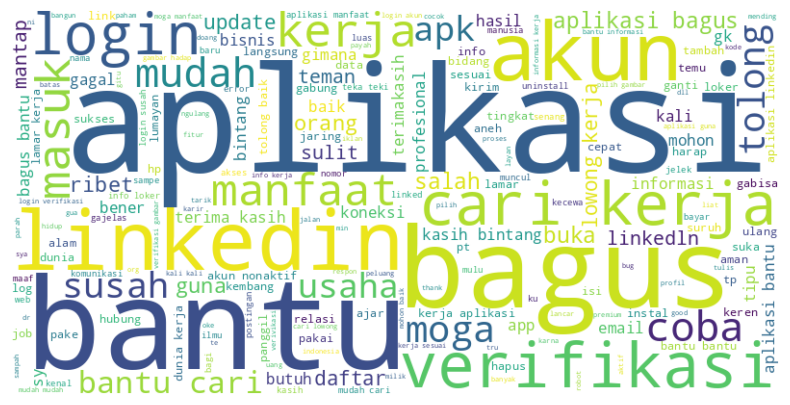

In [32]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(' '.join(map(str, content)) for content in my_df['content'])


# Buat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan word cloud dengan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


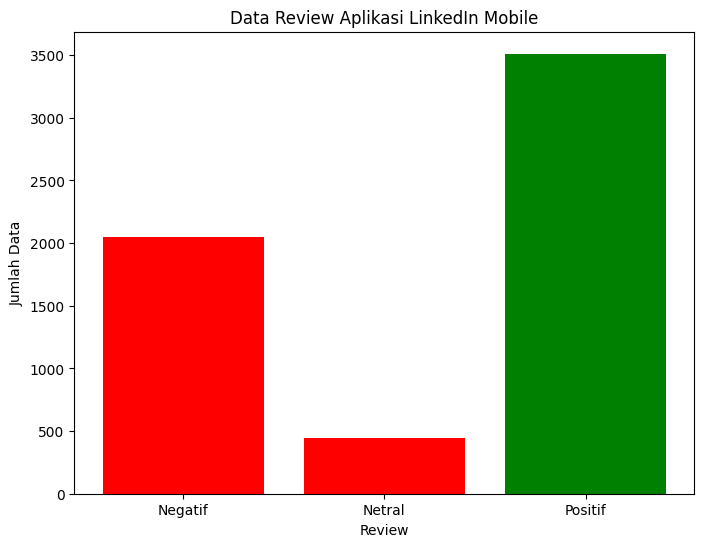

In [33]:
import numpy as np
import matplotlib.pyplot as plt


# Membuat array dengan jumlah unik target dan jumlah data untuk masing-masing target
unique_targets, target_counts = np.unique(y, return_counts=True)

# Menentukan warna untuk setiap target


# Membuat plot batang dengan warna
plt.figure(figsize=(8, 6))
colors = {'Negatif':'red', 'Netral':'blue','Positif' : 'green'}
plt.bar(unique_targets, target_counts, color=[colors[label] for label in unique_targets])
plt.xlabel('Review')
plt.ylabel('Jumlah Data')
plt.title('Data Review Aplikasi LinkedIn Mobile')
plt.show()